In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_data.csv')
df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,The Witness,10.0,Masterpiece,PC,Puzzle,2016,1,25
2,Disco Elysium: The Final Cut,10.0,Masterpiece,PlayStation 5,"Role-playing (RPG), Adventure, Indie",2021,3,30
3,Disco Elysium: The Final Cut,10.0,Masterpiece,PC,"Role-playing (RPG), Adventure, Indie",2021,3,30
4,Deathloop,10.0,Masterpiece,PC,"Shooter, Adventure",2021,9,13
...,...,...,...,...,...,...,...,...
20907,High Rollers Casino,1.0,Unbearable,Xbox,Casino,2004,11,23
20908,Step Up,1.0,Unbearable,Wii,Sports,2011,11,10
20909,Action Girlz Racing,0.8,Disaster,Wii,Racing,2009,2,11
20910,Extreme PaintBrawl,0.7,Disaster,PC,Action,1998,10,29


In [5]:
missing_values = df.isnull().sum()
missing_values

title             0
score             0
score_phrase      0
platform          0
genre            30
release_year      0
release_month     0
release_day       0
dtype: int64

> 1. Games Released over the years

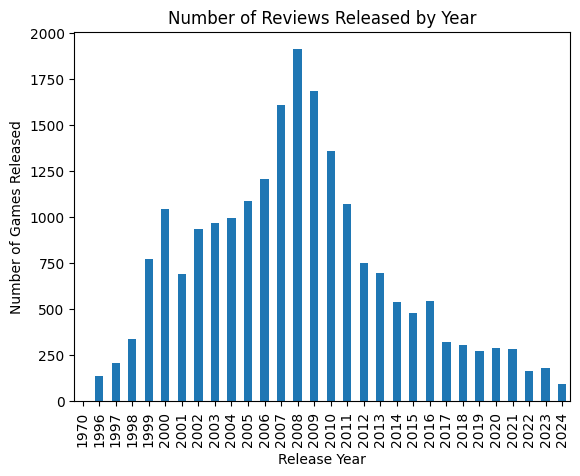

In [19]:
df.groupby(by = 'release_year').title.count().plot(kind = 'bar')

plt.title('Number of Reviews Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')

plt.show()

In [20]:
df.query('release_year == 1970')

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
3463,The Walking Dead: The Game -- Episode 1: A New...,8.5,Great,Xbox 360,Adventure,1970,1,1


In [21]:
df = df.query('release_year != 1970')

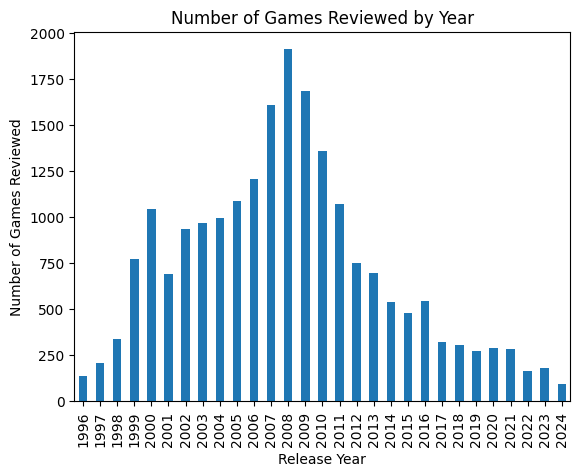

In [24]:
released_games = df.groupby(by='release_year').title.count().plot(kind='bar')

plt.title('Number of Games Reviewed by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Reviewed')

plt.show()

> 2. Reviews per Month

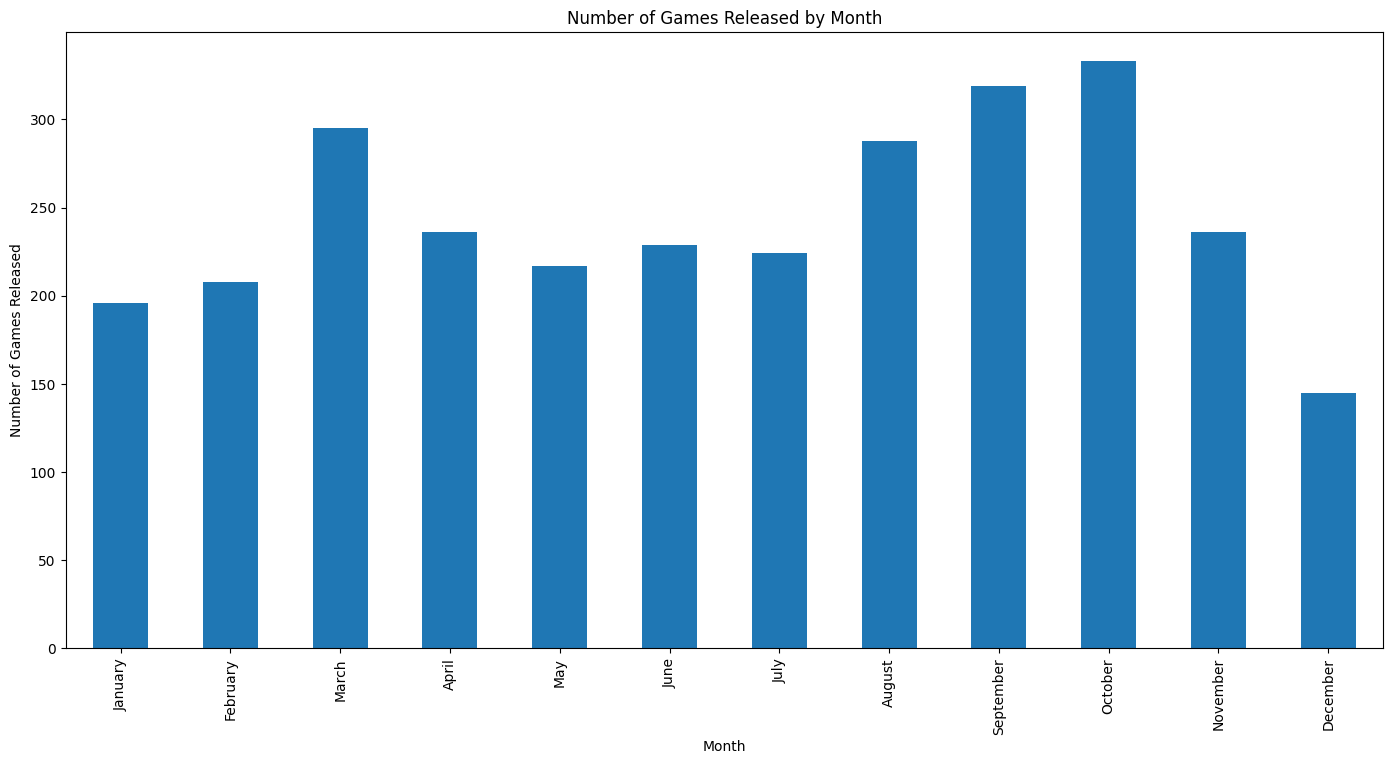

In [14]:
df_filter = df[df['release_year'] > 2014]
plt.figure(figsize=(17,8))
df_filter.groupby(['release_month']).size().plot(kind='bar')
plt.xticks(range(0,12),['January','February','March','April','May','June',
            'July','August','September','October','November','December'])
plt.title('Number of Games Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Games Released')
plt.show()

> 3. Game Score Distribution

In [7]:
df['score_phrase'].value_counts()

score_phrase
Great          5512
Good           5403
Okay           3266
Amazing        2175
Mediocre       2117
Bad            1266
Awful           663
Painful         339
Masterpiece      97
Unbearable       71
Disaster          3
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

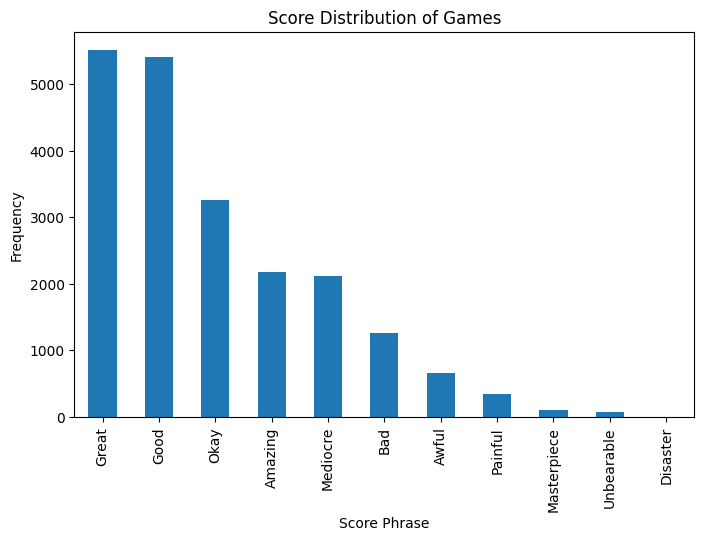

In [8]:
plt.figure(figsize=(8, 5))
df['score_phrase'].value_counts().plot(kind='bar')
plt.title('Score Distribution of Games')
plt.xlabel('Score Phrase')
plt.ylabel('Frequency')

> 4. Genre Distribution

In [22]:
df['genre'].unique()

array(['Racing', 'Puzzle', 'Role-playing (RPG), Adventure, Indie',
       'Shooter, Adventure', 'Racing, Sport',
       'Role-playing (RPG), Adventure',
       "Role-playing (RPG), Hack and slash/Beat 'em up, Adventure",
       'Puzzle, Role-playing (RPG), Adventure',
       'Role-playing (RPG), Simulator, Strategy, Turn-based strategy (TBS), Indie',
       'Shooter, Platform, Adventure', 'Platform, Adventure, Indie',
       'Action, Adventure',
       'Role-playing (RPG), Strategy, Turn-based strategy (TBS), Tactical, Adventure',
       'Action, RPG', 'RPG', 'Shooter, Tactical, Adventure',
       'Role-playing (RPG), Simulator, Strategy', 'Adventure',
       'Adventure, Indie, Visual Novel',
       'Role-playing (RPG), Turn-based strategy (TBS), Adventure, Indie',
       'Platform', 'Simulator', 'Shooter, Role-playing (RPG), Adventure',
       'Shooter, Puzzle, Adventure',
       'Role-playing (RPG), Turn-based strategy (TBS), Adventure',
       'Action', 'Sports, Action', 'Puzzle, Ad

In [8]:
genres = df['genre'].str.split(', ', expand=True)
genre_popularity = genres.stack().value_counts()
genre_popularity

Action                        5890
Adventure                     3363
Sports                        2181
Shooter                       2176
Racing                        1650
Strategy                      1517
RPG                           1461
Puzzle                        1330
Platformer                     849
Fighting                       788
Simulation                     731
Role-playing (RPG)             683
Indie                          564
Music                          456
Simulator                      372
Platform                       296
Sport                          242
Compilation                    213
Arcade                         192
Flight                         188
Hack and slash/Beat 'em up     185
Card                           176
Party                          142
Turn-based strategy (TBS)      134
Wrestling                      134
Tactical                       129
Board                          123
Trivia                         121
Hunting             

In [11]:
genres.unique()

array(['Racing', 'Puzzle', 'Role-playing (RPG)', 'Adventure', 'Indie',
       'Shooter', 'Sport', "Hack and slash/Beat 'em up", 'Simulator',
       'Strategy', 'Turn-based strategy (TBS)', 'Platform', 'Action',
       'Tactical', 'RPG', 'Visual Novel', 'Sports', 'Fighting',
       'Platformer', 'Simulation', 'Compilation', 'Music', 'Card',
       'Party', 'Flight', 'Hardware', 'Wrestling', 'Arcade',
       'Real Time Strategy (RTS)', 'Point-and-click', 'Card & Board Game',
       'Other', 'Educational', 'Pinball', 'Fighthing', 'Unknown',
       'Card & Board', 'Board', 'Productivity', 'Trivia', 'Editor',
       'Battle', 'Episodic', 'First-Person', 'Casino', 'Virtual Pet',
       'Hunting', 'Word Game', 'Baseball', 'MOBA', 'Quiz/Trivia',
       'Fightings', 'Adult', 'Golf'], dtype=object)

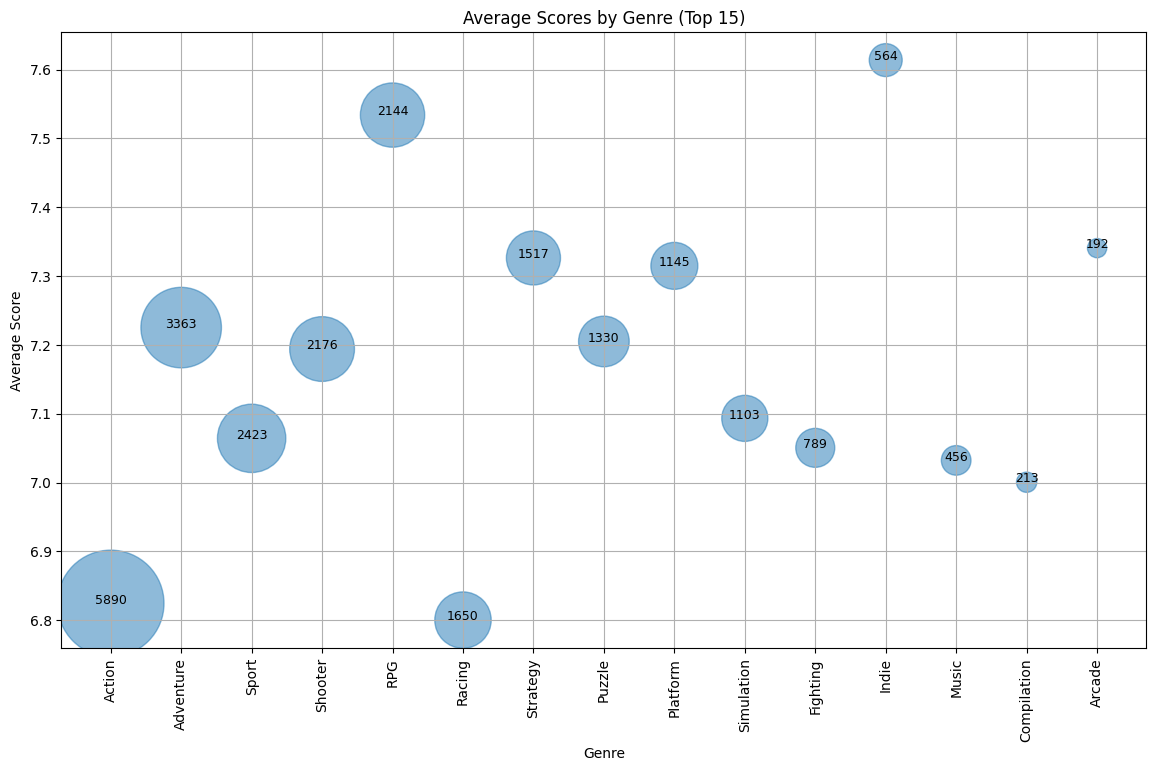

In [12]:
genres = df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_expanded = df.drop(columns=['genre']).join(genres.rename('genre'))

genre_mapping = {
    'Role-playing (RPG)': 'RPG',
    'Platformer' : 'Platform',
    'Sports' : 'Sport',
    'Simulator' : 'Simulation',
    'Card & Board Game' : 'Card & Board',
    'Fightings' : 'Fighting',
}

# Apply the mapping to the 'genre' column
df_expanded['genre'] = df_expanded['genre'].replace(genre_mapping)

# Calculate the average score and number of games for each genre
genre_stats = df_expanded.groupby('genre').agg(
    average_score=('score', 'mean'),
    num_games=('title', 'count')
).reset_index()

top_15_genres = genre_stats.sort_values(by='num_games', ascending=False).head(15)

# Plot the bubble chart
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    x=top_15_genres['genre'], 
    y=top_15_genres['average_score'], 
    s=top_15_genres['num_games'],  # Scale bubble size (adjust multiplier as needed)
    alpha=0.5
)

plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.title('Average Scores by Genre (Top 15)')
plt.xticks(rotation=90)  # Rotate genre labels for better readability
plt.grid(True)

# Add labels to bubbles
for i in range(len(top_15_genres)):
    plt.text(
        x=top_15_genres['genre'].iloc[i], 
        y=top_15_genres['average_score'].iloc[i], 
        s=f"{top_15_genres['num_games'].iloc[i]}", 
        fontsize=9, ha='center'
    )

plt.show()

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

df = df.dropna()

# Feature Engineering
# Handle multi-category genres
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['genre'].str.split(', '))
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_, index=df.index)

# One-hot encode platforms
platform_encoder = OneHotEncoder(sparse=False)
platform_matrix = platform_encoder.fit_transform(df[['platform']])
platform_df = pd.DataFrame(platform_matrix, columns=platform_encoder.get_feature_names_out(['platform']), index=df.index)

# Combine features
features_df = pd.concat([genre_df, platform_df, df[['release_year', 'score']]], axis=1)

# Similarity Calculation
similarity_matrix = cosine_similarity(features_df)

# Recommendation Function
def get_recommendations(game_title, df, similarity_matrix, n=5):
    idx = df[df['title'] == game_title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    game_indices = [i[0] for i in sim_scores]
    return df.iloc[game_indices][['title', 'platform', 'genre', 'score']]


c:\Users\screm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Saved model to recommendation_model.pkl


In [26]:
recommendations = get_recommendations('Final Fantasy XIV: Dawntrail', df, similarity_matrix)
recommendations = recommendations.to_dict(orient='records')
recommendations


[{'title': 'Shin Megami Tensei V: Vengeance',
  'platform': 'PC',
  'genre': 'Role-playing (RPG), Adventure',
  'score': 8.0},
 {'title': 'The Thaumaturge',
  'platform': 'PC',
  'genre': 'Role-playing (RPG), Adventure',
  'score': 8.0},
 {'title': 'THE FINALS',
  'platform': 'PC',
  'genre': 'Role-playing (RPG), Adventure',
  'score': 8.0},
 {'title': 'NieR Replicant ver.1.22474487139...',
  'platform': 'PC',
  'genre': 'Role-playing (RPG), Adventure',
  'score': 8.0},
 {'title': 'Monster Hunter Stories 2: Wings of Ruin',
  'platform': 'PC',
  'genre': 'Role-playing (RPG), Adventure',
  'score': 8.0}]

C:\Users\screm\AppData\Local\Temp\ipykernel_2288\1879597116.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['platform'] = platform_encoder.fit_transform(df['platform'])


Accuracy: 0.18


c:\Users\screm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


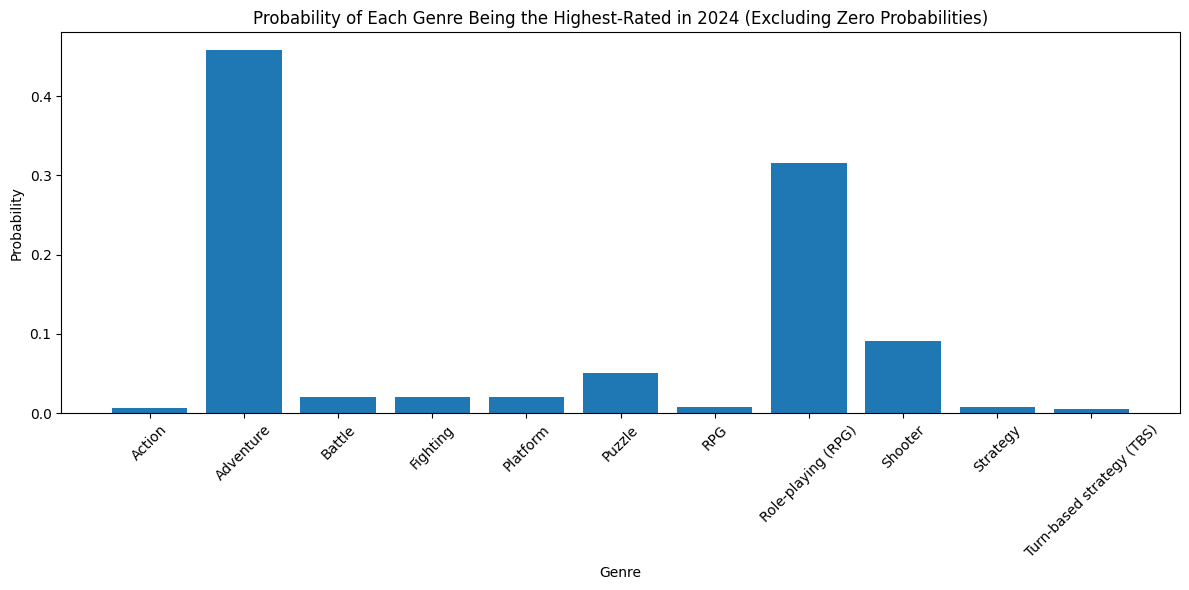

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert platform to numerical
platform_encoder = LabelEncoder()
df['platform'] = platform_encoder.fit_transform(df['platform'])

# Split the genres into separate rows
df = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df['genre'] = df['genre'].str.strip()  # Remove any extra whitespace

# Create a column marking if a game was the highest rated in its year
highest_scores = df.groupby('release_year')['score'].transform(max)
df['is_top_game'] = (df['score'] == highest_scores).astype(int)

# Use only rows where genre is the target for classification
train_data = df[df['release_year'] <= 2023]

# Features and target
X = train_data[['release_year', 'platform', 'score']]
y = train_data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict probabilities for a specific input
predicted_proba = clf.predict_proba([[2024, 1, 10]])
genre_probs = predicted_proba[0]

genres = clf.classes_

non_zero_indices = genre_probs > 0
filtered_genres = genres[non_zero_indices]
filtered_probs = genre_probs[non_zero_indices]

plt.figure(figsize=(12, 6))
plt.bar(filtered_genres, filtered_probs)
plt.xlabel('Genre')
plt.ylabel('Probability')
plt.title('Probability of Each Genre Being the Highest-Rated in 2024 (Excluding Zero Probabilities)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df['platform'].unique()

array(['Lynx', 'PC', 'PlayStation 5', 'Xbox Series X', 'Nintendo Switch',
       'Meta Quest', 'Wii', 'Macintosh', 'PlayStation 3', 'Xbox One',
       'PlayStation 4', 'Wireless', 'Game Boy Color', 'iPhone',
       'Xbox 360', 'Game Boy', 'Nintendo 64', 'Dreamcast',
       'NeoGeo Pocket Color', 'Xbox', 'PlayStation 2', 'Game Boy Advance',
       'Wii U', 'GameCube', 'PlayStation', 'Nintendo 3DS', 'iPad',
       'Nintendo DS', 'PlayStation Vita', 'PlayStation Portable', 'Linux',
       'NES', 'Arcade', 'Android', 'Nintendo DSi', '3DS',
       'iOS (iPhone/iPad)', 'Stadia', 'Master System', 'Genesis',
       'Saturn', 'Super NES', 'iPod', 'SteamOS', 'N-Gage',
       'New Nintendo 3DS', 'WonderSwan Color', 'Pocket PC',
       'TurboGrafx-16', 'Windows Phone', 'NeoGeo', 'TurboGrafx-CD',
       'Nintendo 64DD', 'Ouya', 'Sega 32X', 'Atari 5200', 'WonderSwan',
       'Web Games', 'Atari 2600', 'Commodore 64/128', 'Vectrex',
       'Game.Com', 'Sega CD', 'Windows Surface', 'Dreamcast VMU',
  

In [4]:
platform_groups = {
    "PC": ['PC', 'Macintosh', 'Linux', 'SteamOS', 'Windows Surface'],
    "Nintendo": ['Nintendo Switch', 'Super NES', 'Wii', 'Nintendo 64', 'Wii U', 'Nintendo 3DS', 'Nintendo DS', 'NES', 'Nintendo DSi', '3DS', 'New Nintendo 3DS', 'Nintendo 64DD', 'GameCube'],
    "PlayStation": ['PlayStation 5', 'PlayStation', 'PlayStation 2', 'PlayStation 3', 'PlayStation 4', 'PlayStation Portable', 'PlayStation Vita'],
    "Xbox": ['Xbox Series X', 'Xbox', 'Xbox 360', 'Xbox One'],
    "Mobile": ['iPhone', 'iPad', 'Android', 'Windows Phone', 'iPod', 'Pocket PC', 'iOS (iPhone/iPad)'],
    "Sega": ['Genesis', 'Sega CD', 'Saturn', 'Dreamcast', 'Master System', 'Sega 32X']
}

all_grouped_platforms = [platform for platforms in platform_groups.values() for platform in platforms]
        
platform_data = {}

for group, platforms in platform_groups.items():
    platform_data[group] = df[df['platform'].isin(platforms)].groupby(by='release_year').size()

platform_data['Other'] = df[~df['platform'].isin(all_grouped_platforms)].groupby(by='release_year').size()
df_platform = pd.DataFrame(platform_data).fillna(0).astype(int)
df_platform = df_platform.reset_index()
all_grouped_platforms

['PC',
 'Macintosh',
 'Linux',
 'SteamOS',
 'Windows Surface',
 'Nintendo Switch',
 'Super NES',
 'Wii',
 'Nintendo 64',
 'Wii U',
 'Nintendo 3DS',
 'Nintendo DS',
 'NES',
 'Nintendo DSi',
 '3DS',
 'New Nintendo 3DS',
 'Nintendo 64DD',
 'GameCube',
 'PlayStation 5',
 'PlayStation',
 'PlayStation 2',
 'PlayStation 3',
 'PlayStation 4',
 'PlayStation Portable',
 'PlayStation Vita',
 'Xbox Series X',
 'Xbox',
 'Xbox 360',
 'Xbox One',
 'iPhone',
 'iPad',
 'Android',
 'Windows Phone',
 'iPod',
 'Pocket PC',
 'iOS (iPhone/iPad)',
 'Genesis',
 'Sega CD',
 'Saturn',
 'Dreamcast',
 'Master System',
 'Sega 32X']